# 1. Load Data
----

In [1]:
!pip install kagglehub[pandas-datasets]
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

- Import the location of the dataset posted on Kaggle: https://www.kaggle.com/datasets/jonassouza872/vitoria-da-conquista-weather-data-september

In [2]:
import kagglehub
import os
# Store the path of the Kaggle dataset
path = kagglehub.dataset_download("jonassouza872/vitoria-da-conquista-weather-data-september")
# Check if the path is correct
print(path)

# List all files inside the downloaded folder
print(os.listdir(path))

100%|██████████| 1.54M/1.54M [00:00<00:00, 45.1MB/s]

Extracting files...


/root/.cache/kagglehub/datasets/jonassouza872/vitoria-da-conquista-weather-data-september/versions/1
['temp.csv']


In [3]:
import pandas as pd
df = pd.read_csv(f"{path}/temp.csv")  # Reads the declared path as a CSV file
df.head()  # Prints the first 5 rows of the dataset

,Timestamp,Temp_MPU6050_C,Temp_AHT20_C,Umid_AHT20_pct,Temp_BMP280_C,Press_BMP280_hPa,Temp_BMP180_C,Press_BMP180_hPa,Temp_DS18B20_C,Temp_NTC_C,Temp_DHT11_C,Umid_DHT11_pct
0,2025-08-31 22:31:02,20.86,19.90,73.37,21.28,921.24,20.19,923.02,25.69,22.26,20.03,66.0
1,2025-08-31 22:31:33,21.75,19.97,75.57,21.48,921.12,20.27,923.04,23.81,20.73,20.02,66.0
2,2025-08-31 22:32:05,21.80,19.75,74.31,21.25,921.20,20.16,923.06,22.50,20.88,20.02,67.0
3,2025-08-31 22:32:36,21.57,19.55,74.77,21.07,921.15,20.06,922.99,21.31,20.62,20.01,66.0
4,2025-08-31 22:33:07,21.66,19.60,75.09,21.12,921.25,20.06,923.02,21.88,20.95,20.00,66.0


In [4]:
df.columns #all columns

Index(['Timestamp', 'Temp_MPU6050_C', 'Temp_AHT20_C', 'Umid_AHT20_pct',
       'Temp_BMP280_C', 'Press_BMP280_hPa', 'Temp_BMP180_C',
       'Press_BMP180_hPa', 'Temp_DS18B20_C', 'Temp_NTC_C', 'Temp_DHT11_C',
       'Umid_DHT11_pct'],
      dtype='object')

# 2. Temporal Analyses

----

## 2.1. Complete Time Series
--------

Task: Plot all readings over the 30-day period, identify daily patterns and trends, and mark anomalous events.

### 2.1.1. Temperature

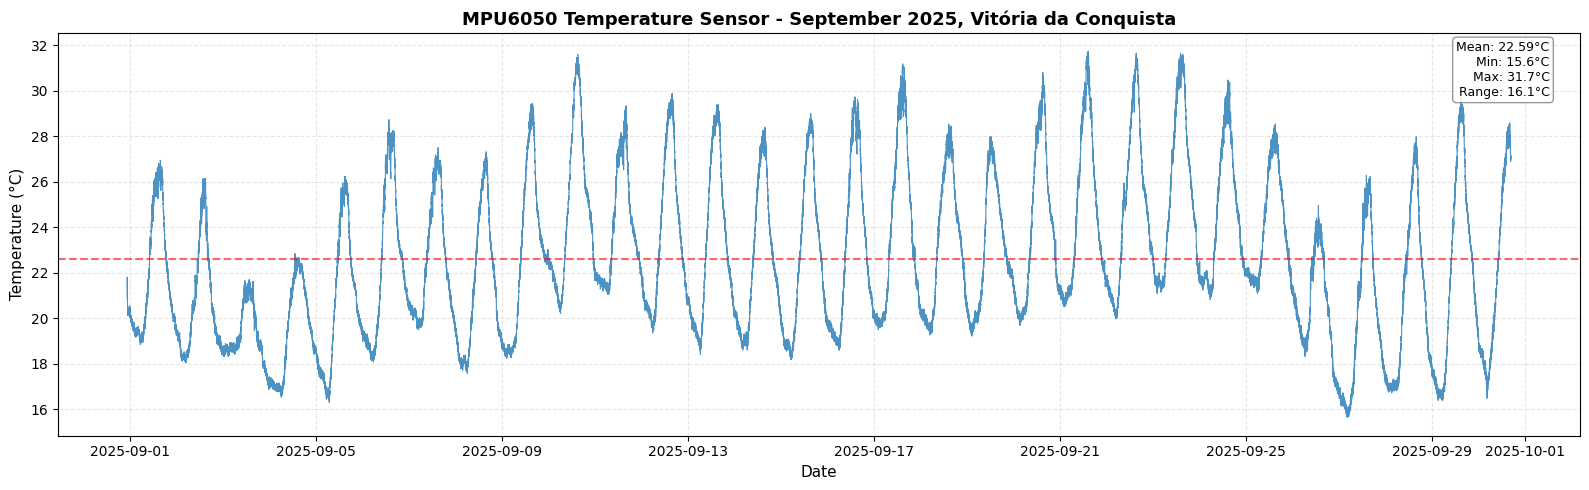

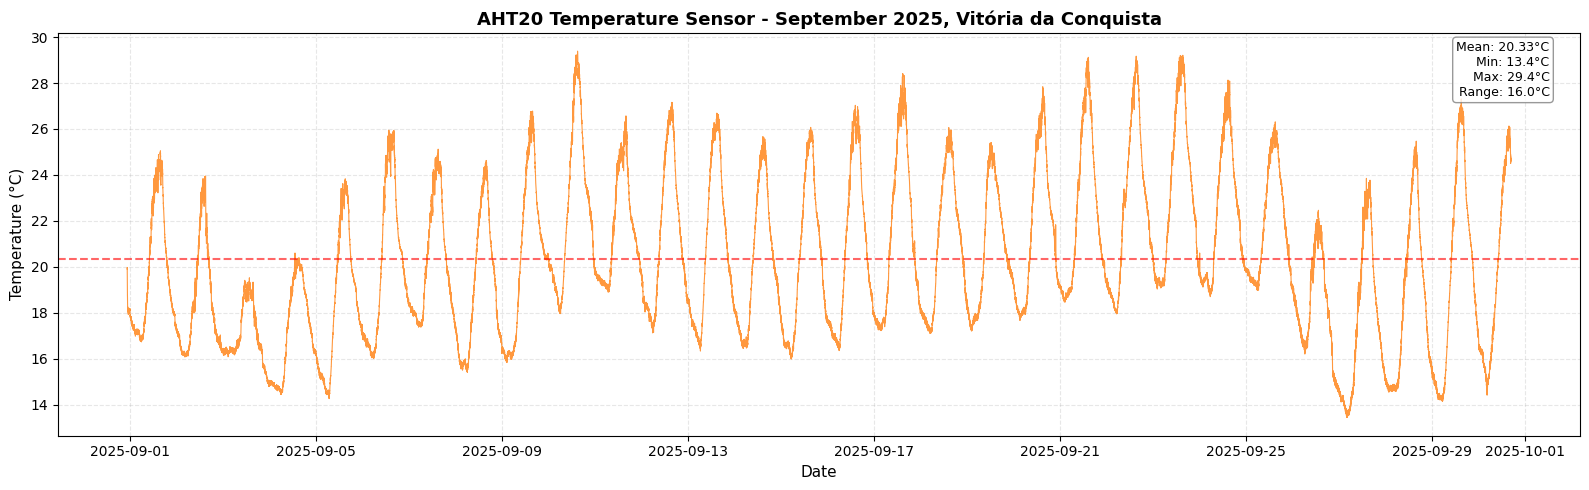

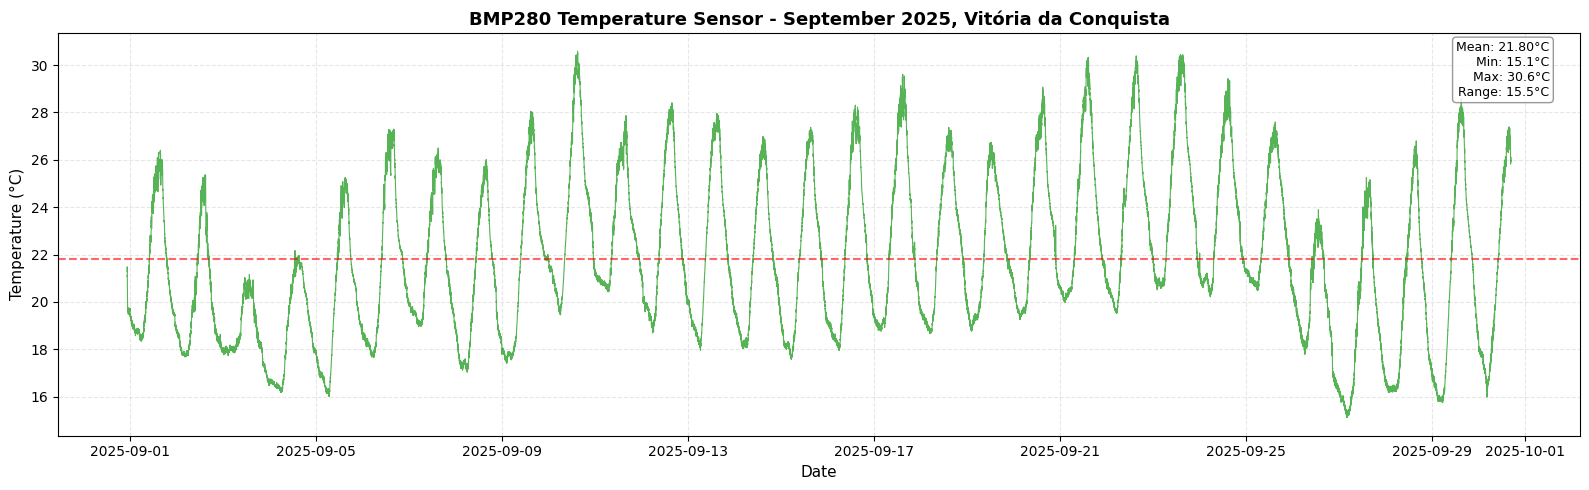

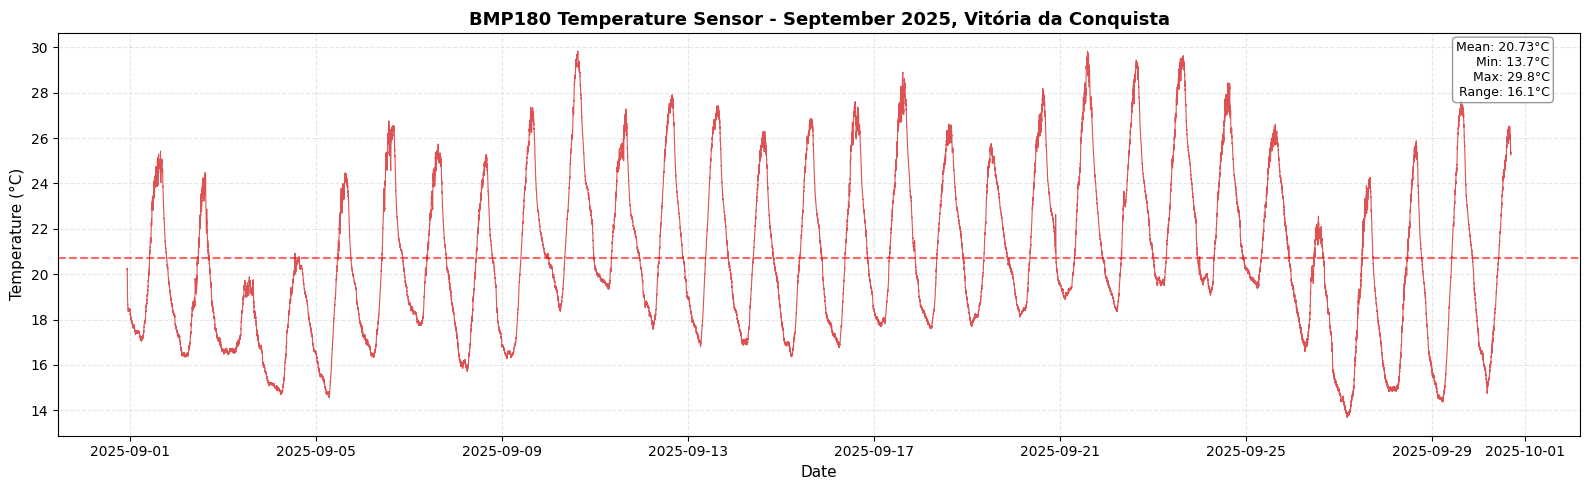

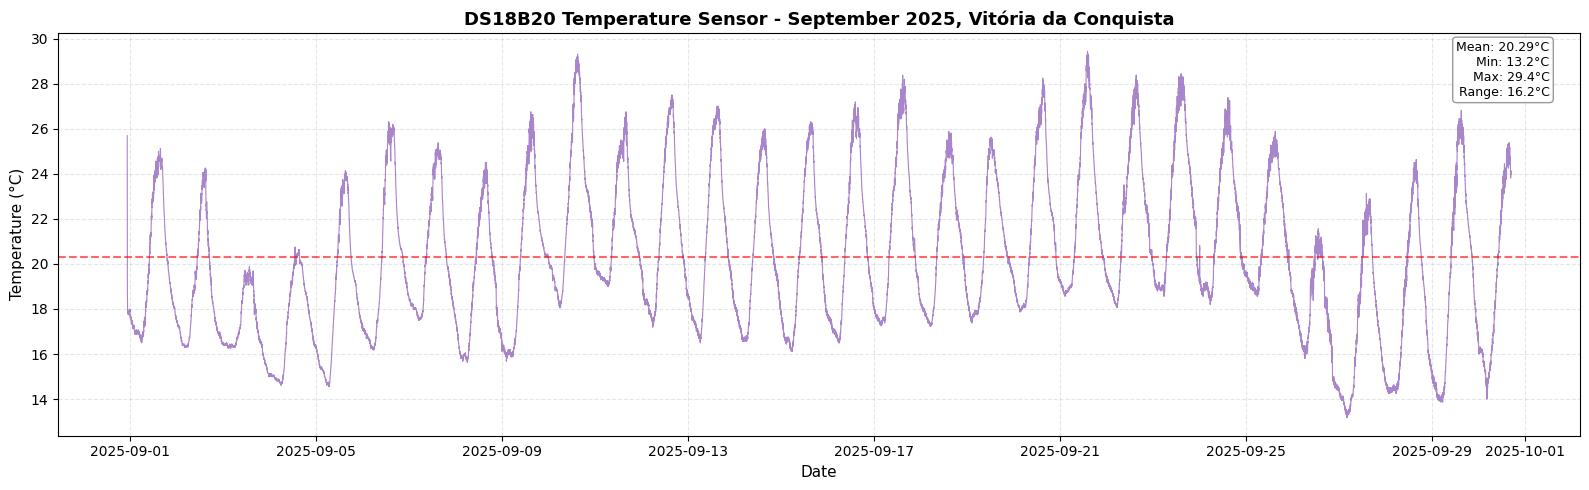

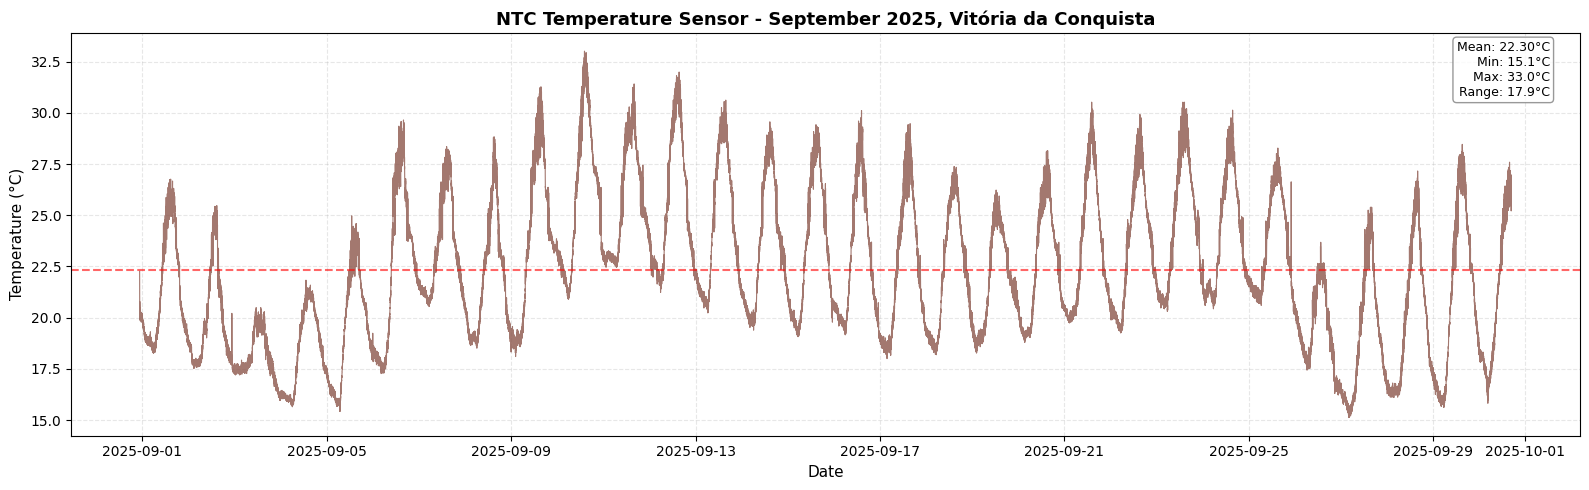

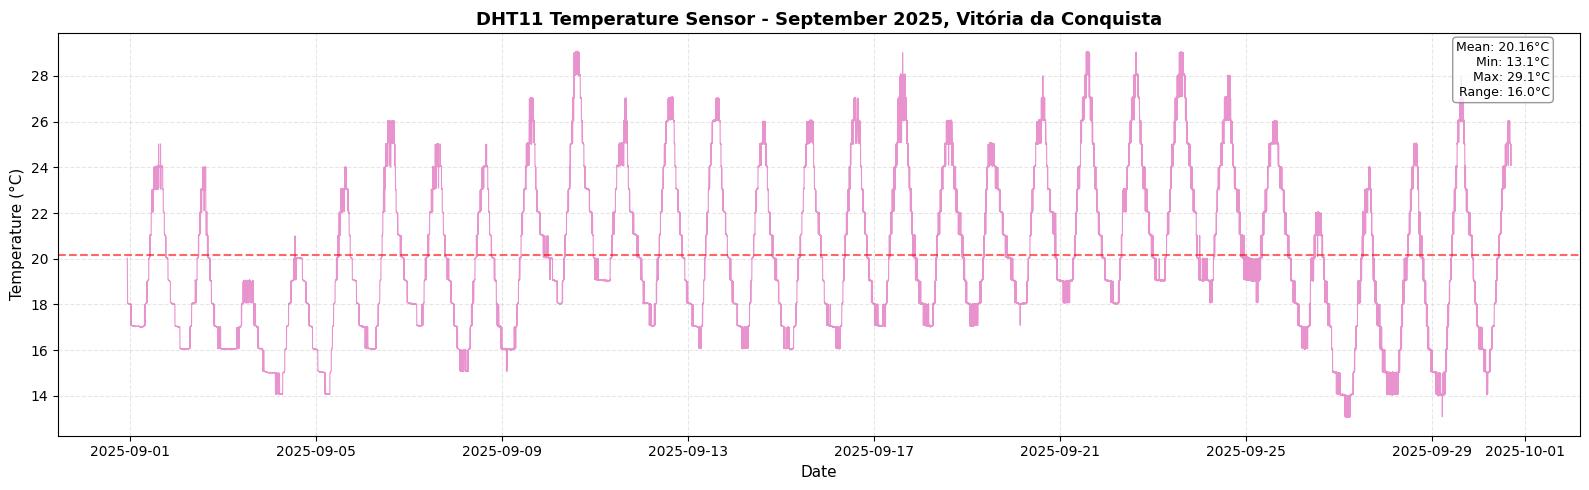

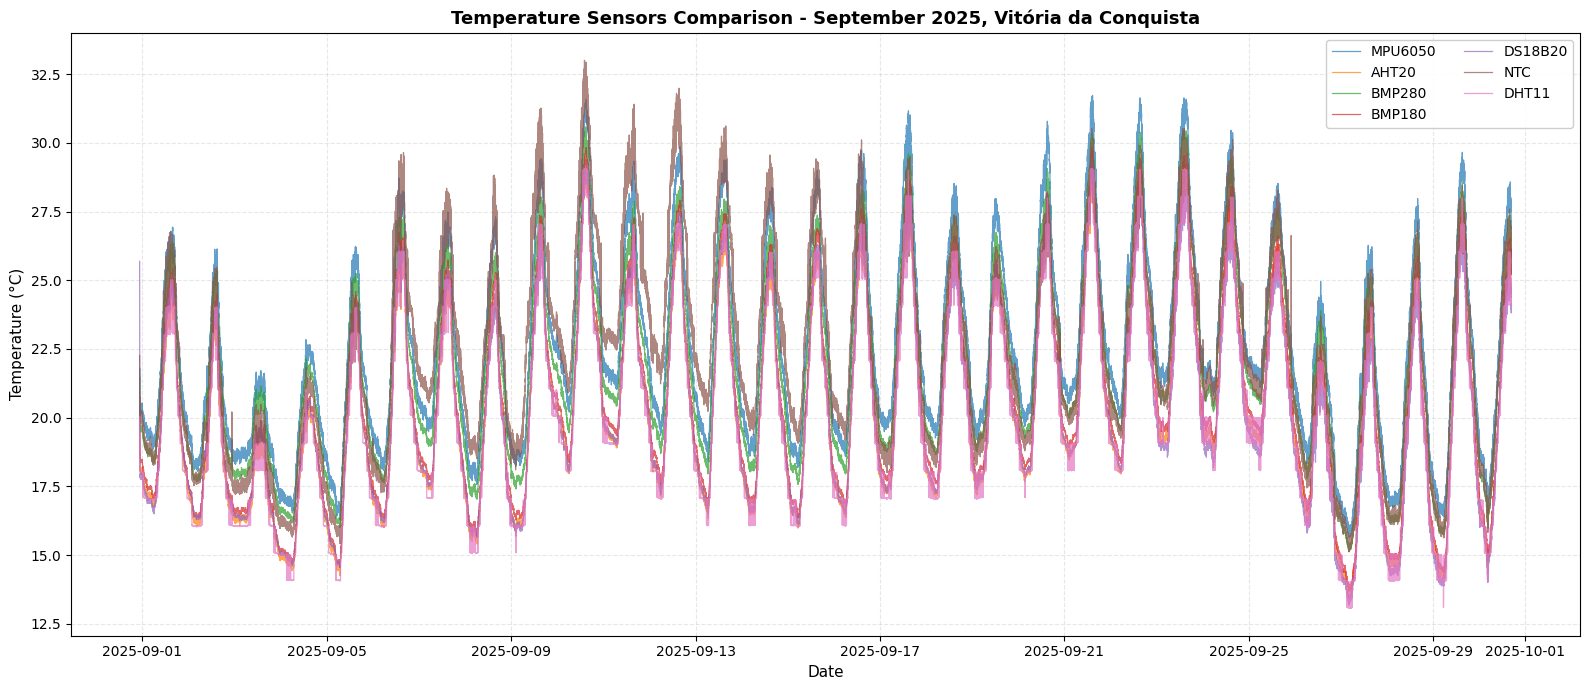

In [18]:
# INDIVIDUAL TEMPORAL ANALYSIS - TEMPERATURE SENSORS

# Define sensors and visual configuration
temp_sensors = ['Temp_MPU6050_C', 'Temp_AHT20_C', 'Temp_BMP280_C',
                'Temp_BMP180_C', 'Temp_DS18B20_C', 'Temp_NTC_C', 'Temp_DHT11_C']
sensor_names = ['MPU6050', 'AHT20', 'BMP280', 'BMP180', 'DS18B20', 'NTC', 'DHT11']
colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2'   # Pink
]

# Individual plots
for sensor, color, name in zip(temp_sensors, colors, sensor_names):
    fig, ax = plt.subplots(figsize=(16, 5))
    ax.plot(df.index, df[sensor], color=color, alpha=0.8, linewidth=0.8)  # plot series
    mean_val = df[sensor].mean()  # mean
    min_val = df[sensor].min()    # minimum
    max_val = df[sensor].max()    # maximum
    ax.axhline(y=mean_val, color='red', linestyle='--', linewidth=1.5, alpha=0.6)  # mean line
    ax.set_ylabel('Temperature (°C)', fontsize=11)  # y-axis label
    ax.set_xlabel('Date', fontsize=11)  # x-axis label
    ax.set_title(f'{name} Temperature Sensor - September 2025, Vitória da Conquista', fontsize=13, fontweight='bold')  # title
    ax.grid(True, alpha=0.3, linestyle='--')

    # statistics
    stats_text = f'Mean: {mean_val:.2f}°C\nMin: {min_val:.1f}°C\nMax: {max_val:.1f}°C\nRange: {max_val-min_val:.1f}°C'  # calculates mean, min, max, and range
    ax.text(0.98, 0.98, stats_text, transform=ax.transAxes, fontsize=9,  # text box with statistics
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

    plt.tight_layout()
    plt.show()  # Show all individual plots, end of loop

# Final comparative plot
fig, ax = plt.subplots(figsize=(16, 7))

for sensor, color, name in zip(temp_sensors, colors, sensor_names):  # comparison of all sensors together
    ax.plot(df.index, df[sensor], label=name, alpha=0.7, linewidth=0.9, color=color)

ax.set_ylabel('Temperature (°C)', fontsize=11)
ax.set_xlabel('Date', fontsize=11)
ax.set_title('Temperature Sensors Comparison - September 2025, Vitória da Conquista',
             fontsize=13, fontweight='bold')
ax.legend(loc='upper right', fontsize=10, framealpha=0.95, ncol=2)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


The comparative time series reveals strong synchronization among all seven temperature sensors, capturing clear diurnal cycles with amplitudes of 10-12°C throughout September 2025. All sensors track the characteristic pattern of nighttime cooling (15-18°C) and daytime warming (25-28°C) typical of Vitória da Conquista's highland climate, with excellent inter-sensor agreement during most periods. Notable exceptions include the NTC thermistor showing extreme spikes up to 33°C (likely due to direct solar exposure or faster thermal response) and occasional divergence during rapid temperature transitions. The DHT11 displays slightly more quantized behavior visible in its step-like response, while precision sensors (BMP280, BMP180, AHT20, DS18B20) maintain the tightest clustering and smoothest trajectories. The final week (September 27-30) shows increased variability and lower minimum temperatures (~13°C), possibly indicating a cold front passage or seasonal transition toward spring conditions.

### 2.1.2. Humidity

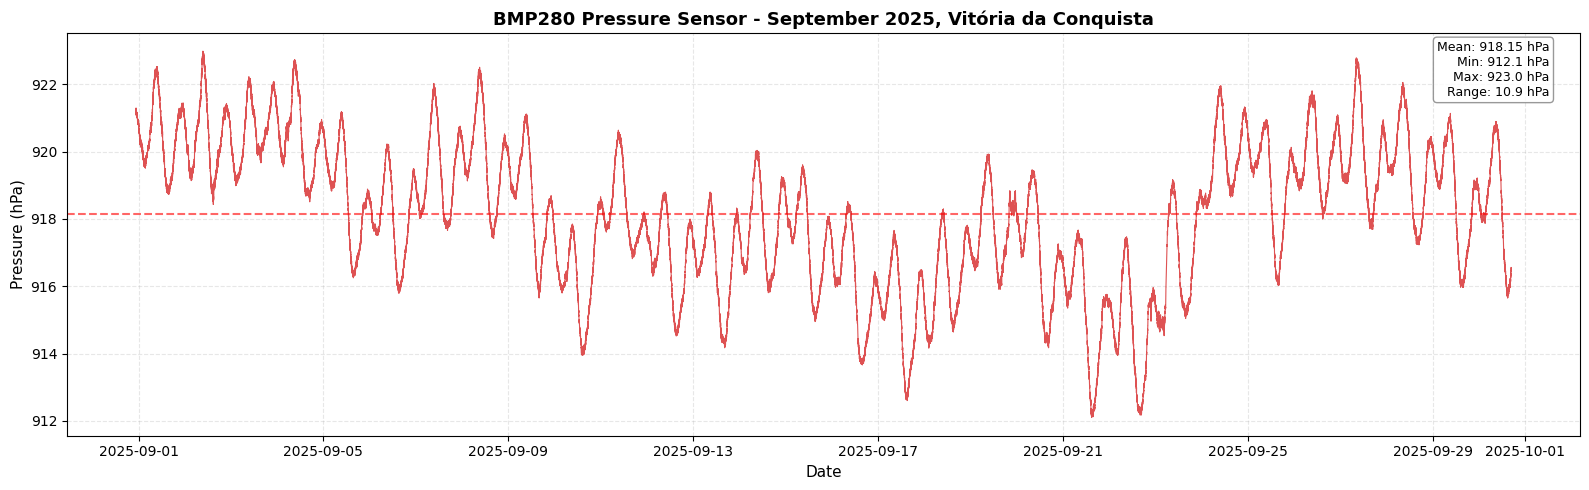

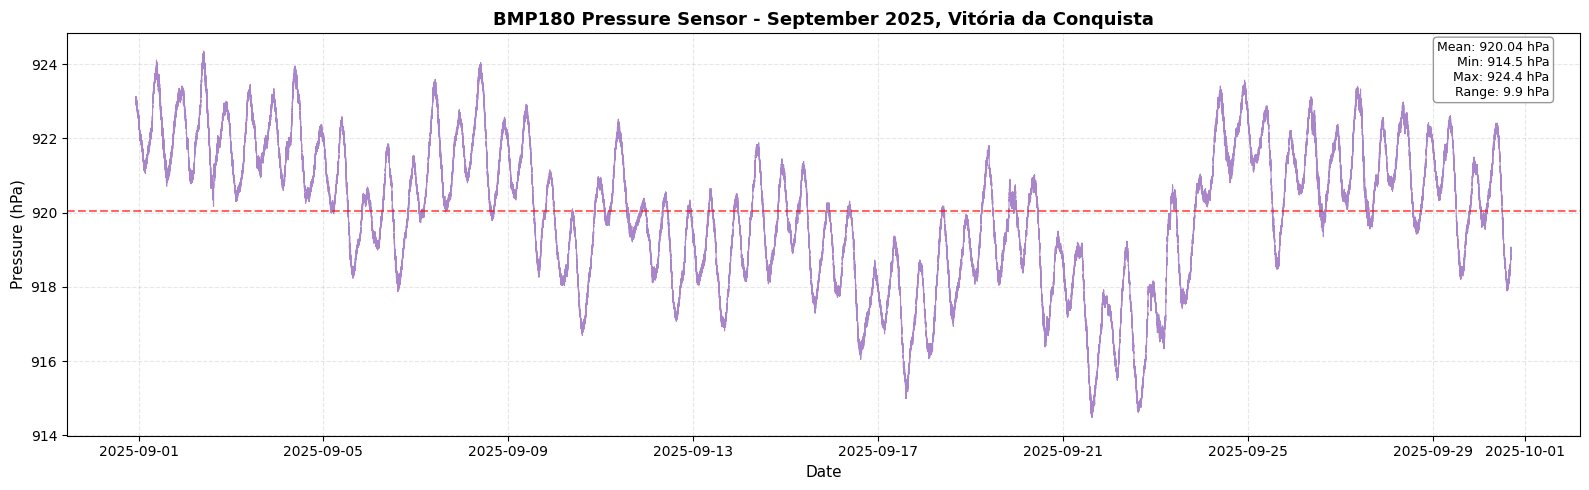

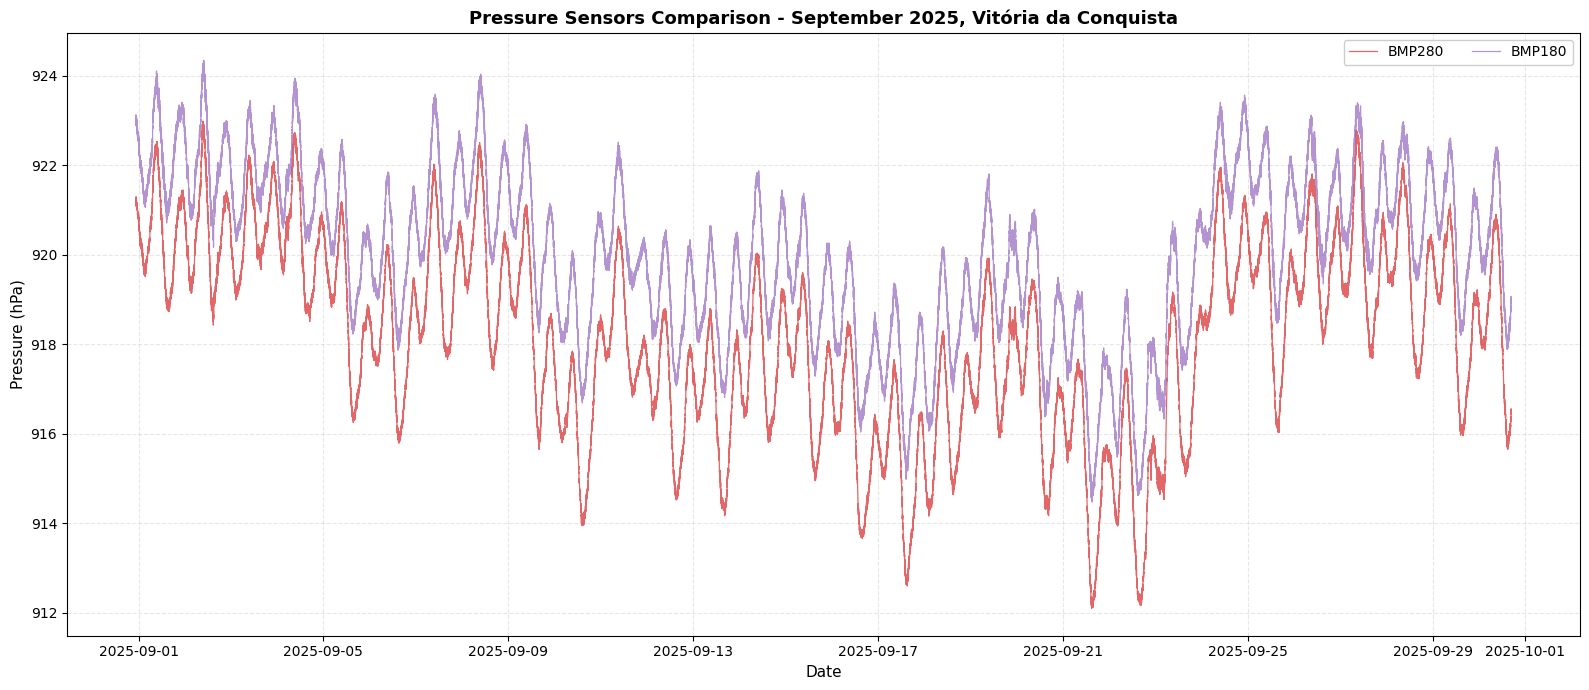

In [21]:
# INDIVIDUAL TEMPORAL ANALYSIS - PRESSURE SENSORS

# Define sensors and visual configuration
pressure_sensors = ['Press_BMP280_hPa', 'Press_BMP180_hPa']
sensor_names = ['BMP280', 'BMP180']
colors = [
    '#d62728',  # Red
    '#9467bd',  # Purple
]

# Individual plots
for sensor, color, name in zip(pressure_sensors, colors, sensor_names):
    fig, ax = plt.subplots(figsize=(16, 5))
    ax.plot(df.index, df[sensor], color=color, alpha=0.8, linewidth=0.8)  # plot series
    mean_val = df[sensor].mean()  # mean
    min_val = df[sensor].min()    # minimum
    max_val = df[sensor].max()    # maximum
    ax.axhline(y=mean_val, color='red', linestyle='--', linewidth=1.5, alpha=0.6)  # mean line
    ax.set_ylabel('Pressure (hPa)', fontsize=11)  # y-axis label
    ax.set_xlabel('Date', fontsize=11)  # x-axis label
    ax.set_title(f'{name} Pressure Sensor - September 2025, Vitória da Conquista', fontsize=13, fontweight='bold')  # title
    ax.grid(True, alpha=0.3, linestyle='--')

    # statistics
    stats_text = f'Mean: {mean_val:.2f} hPa\nMin: {min_val:.1f} hPa\nMax: {max_val:.1f} hPa\nRange: {max_val-min_val:.1f} hPa'  # calculates mean, min, max, and range
    ax.text(0.98, 0.98, stats_text, transform=ax.transAxes, fontsize=9,  # text box with statistics
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

    plt.tight_layout()
    plt.show()  # Show all individual plots, end of loop

# Final comparative plot
fig, ax = plt.subplots(figsize=(16, 7))

for sensor, color, name in zip(pressure_sensors, colors, sensor_names):  # comparison of all sensors together
    ax.plot(df.index, df[sensor], label=name, alpha=0.7, linewidth=0.9, color=color)

ax.set_ylabel('Pressure (hPa)', fontsize=11)
ax.set_xlabel('Date', fontsize=11)
ax.set_title('Pressure Sensors Comparison - September 2025, Vitória da Conquista',
             fontsize=13, fontweight='bold')
ax.legend(loc='upper right', fontsize=10, framealpha=0.95, ncol=2)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


The humidity comparison reveals pronounced diurnal oscillations with the AHT20 sensor consistently reading 5-15% higher than the DHT11 across all conditions, reaching peaks of 85-92% during nighttime fog events and dropping to 20-40% during dry afternoon periods. Both sensors capture the characteristic bimodal pattern discussed earlier, with the AHT20 displaying smoother transitions and better tracking of gradual humidity changes, while the DHT11 shows more abrupt steps and noise, particularly visible during rapid morning desiccation phases. The consistent offset between sensors suggests either calibration differences or the DHT11's known tendency to underestimate humidity at high values and overestimate at low values due to its limited accuracy (±5% RH). Notable patterns include extremely low humidity minima (~20-25%) during mid-to-late September afternoons, indicating intense solar heating and dry air masses typical of the late dry season. The final days show reduced diurnal amplitude and higher baseline humidity, potentially signaling the approach of the wet season or increased atmospheric moisture from approaching weather systems.

### 2.1.3. Pressure

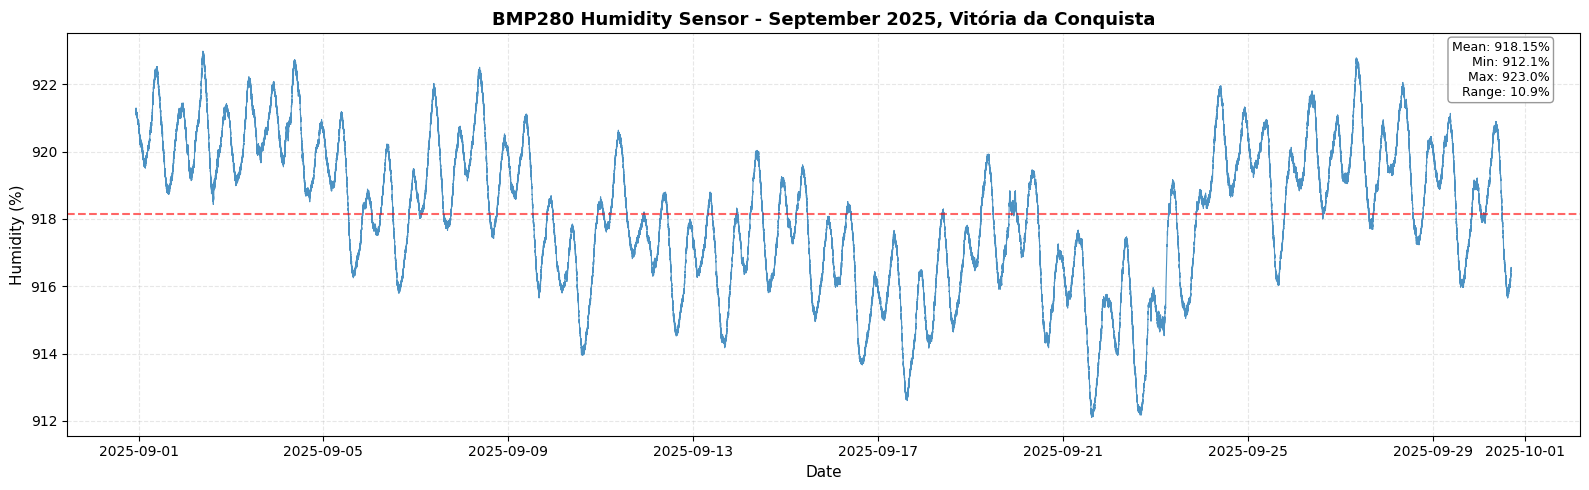

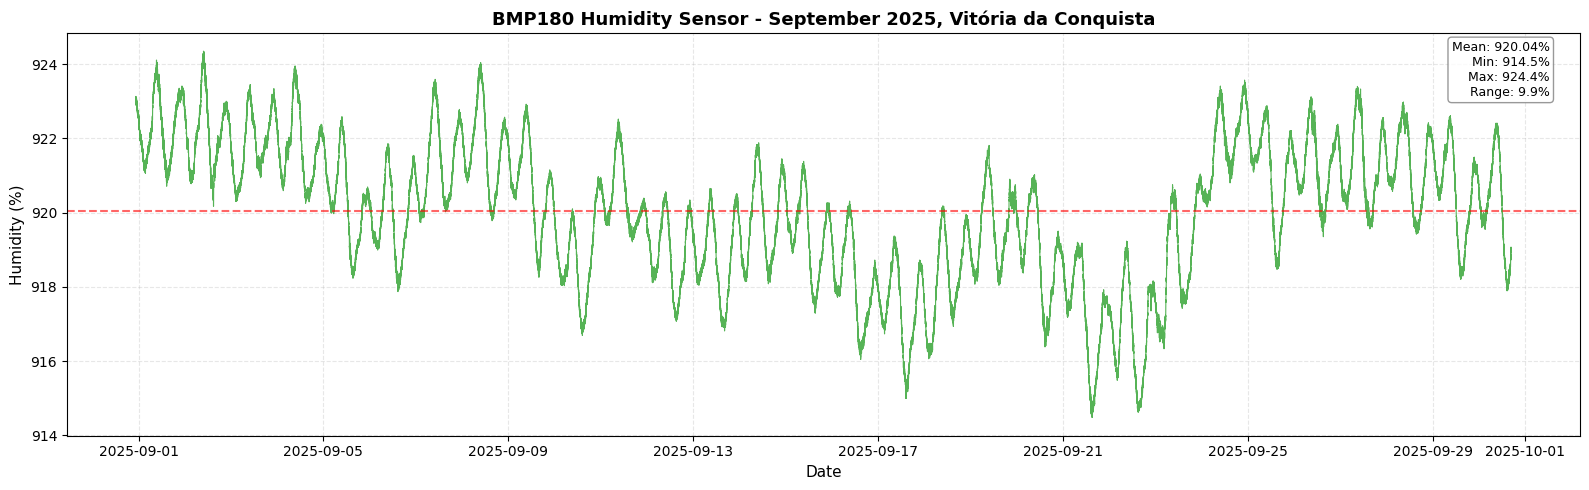

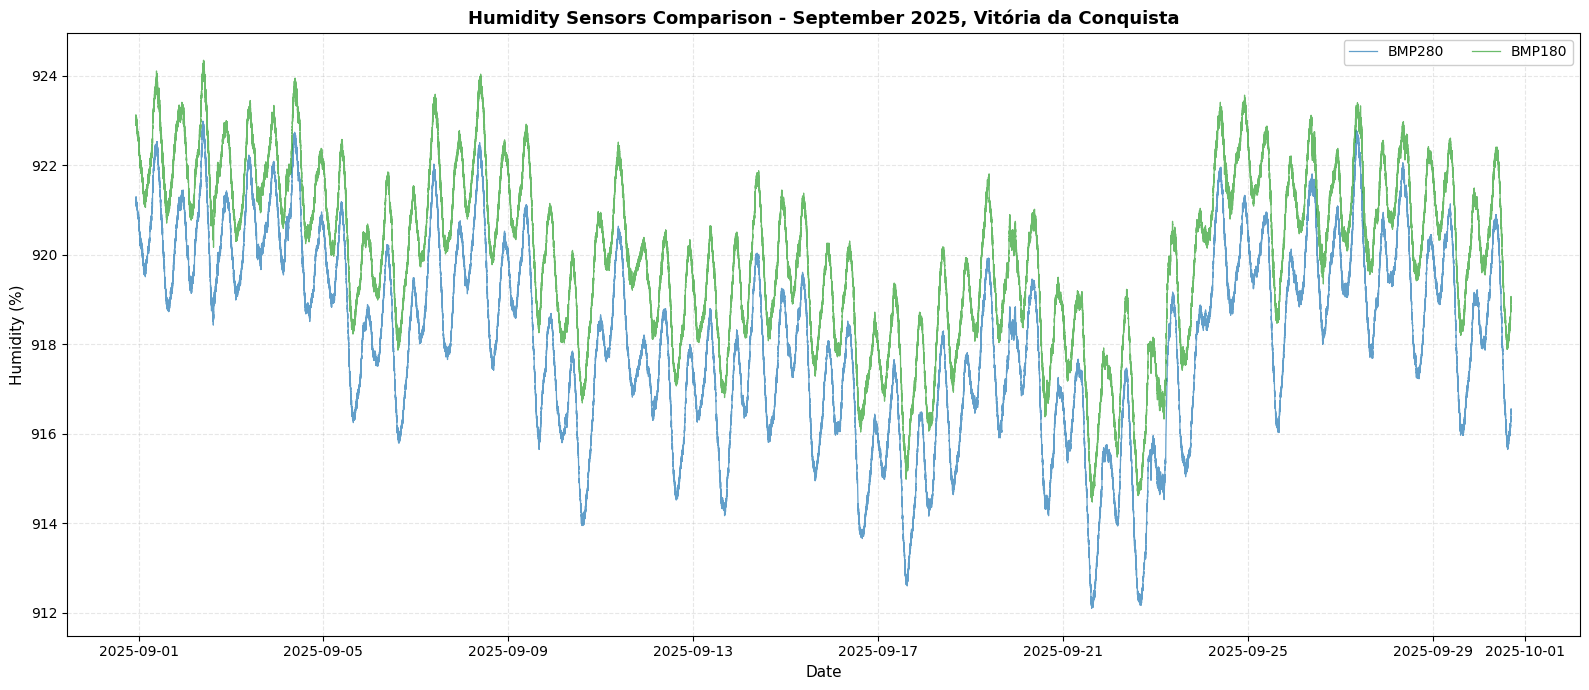

In [40]:
# INDIVIDUAL TEMPORAL ANALYSIS - HUMIDITY SENSORS

# Define sensors and visual configuration
humidity_sensors = ['Press_BMP280_hPa', 'Press_BMP180_hPa']
sensor_names = ['BMP280', 'BMP180']
colors = [
    '#1f77b4',  # Blue
    '#2ca02c',  # Green
]

# Individual plots
for sensor, color, name in zip(humidity_sensors, colors, sensor_names):
    fig, ax = plt.subplots(figsize=(16, 5))
    ax.plot(df.index, df[sensor], color=color, alpha=0.8, linewidth=0.8)  # plot series
    mean_val = df[sensor].mean()  # mean
    min_val = df[sensor].min()    # minimum
    max_val = df[sensor].max()    # maximum
    ax.axhline(y=mean_val, color='red', linestyle='--', linewidth=1.5, alpha=0.6)  # mean line
    ax.set_ylabel('Humidity (%)', fontsize=11)  # y-axis label
    ax.set_xlabel('Date', fontsize=11)  # x-axis label
    ax.set_title(f'{name} Humidity Sensor - September 2025, Vitória da Conquista', fontsize=13, fontweight='bold')  # title
    ax.grid(True, alpha=0.3, linestyle='--')

    # statistics
    stats_text = f'Mean: {mean_val:.2f}%\nMin: {min_val:.1f}%\nMax: {max_val:.1f}%\nRange: {max_val-min_val:.1f}%'  # calculates mean, min, max, and range
    ax.text(0.98, 0.98, stats_text, transform=ax.transAxes, fontsize=9,  # text box with statistics
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

    plt.tight_layout()
    plt.show()  # Show all individual plots, end of loop

# Final comparative plot
fig, ax = plt.subplots(figsize=(16, 7))

for sensor, color, name in zip(humidity_sensors, colors, sensor_names):  # comparison of all sensors together
    ax.plot(df.index, df[sensor], label=name, alpha=0.7, linewidth=0.9, color=color)

ax.set_ylabel('Humidity (%)', fontsize=11)
ax.set_xlabel('Date', fontsize=11)
ax.set_title('Humidity Sensors Comparison - September 2025, Vitória da Conquista',
             fontsize=13, fontweight='bold')
ax.legend(loc='upper right', fontsize=10, framealpha=0.95, ncol=2)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

The pressure sensor comparison demonstrates excellent agreement between BMP280 and BMP180, with both sensors tracking synoptic-scale atmospheric variations over the 30-day period, ranging from 912 to 924 hPa as expected for Vitória da Conquista's 923-meter elevation. The BMP180 consistently reads approximately 1-2 hPa higher than the BMP280 and exhibits slightly greater high-frequency noise, visible as more jagged oscillations, while the BMP280 provides smoother measurements suggesting better signal filtering or higher precision. A clear declining pressure trend is observed from early September (922-924 hPa) through mid-month (914-918 hPa), followed by recovery in late September (920-923 hPa), likely reflecting the passage of a low-pressure system or frontal boundary through the region.

## 2.2. Diurnal Patterns

------

### 2.2.1. Temperature

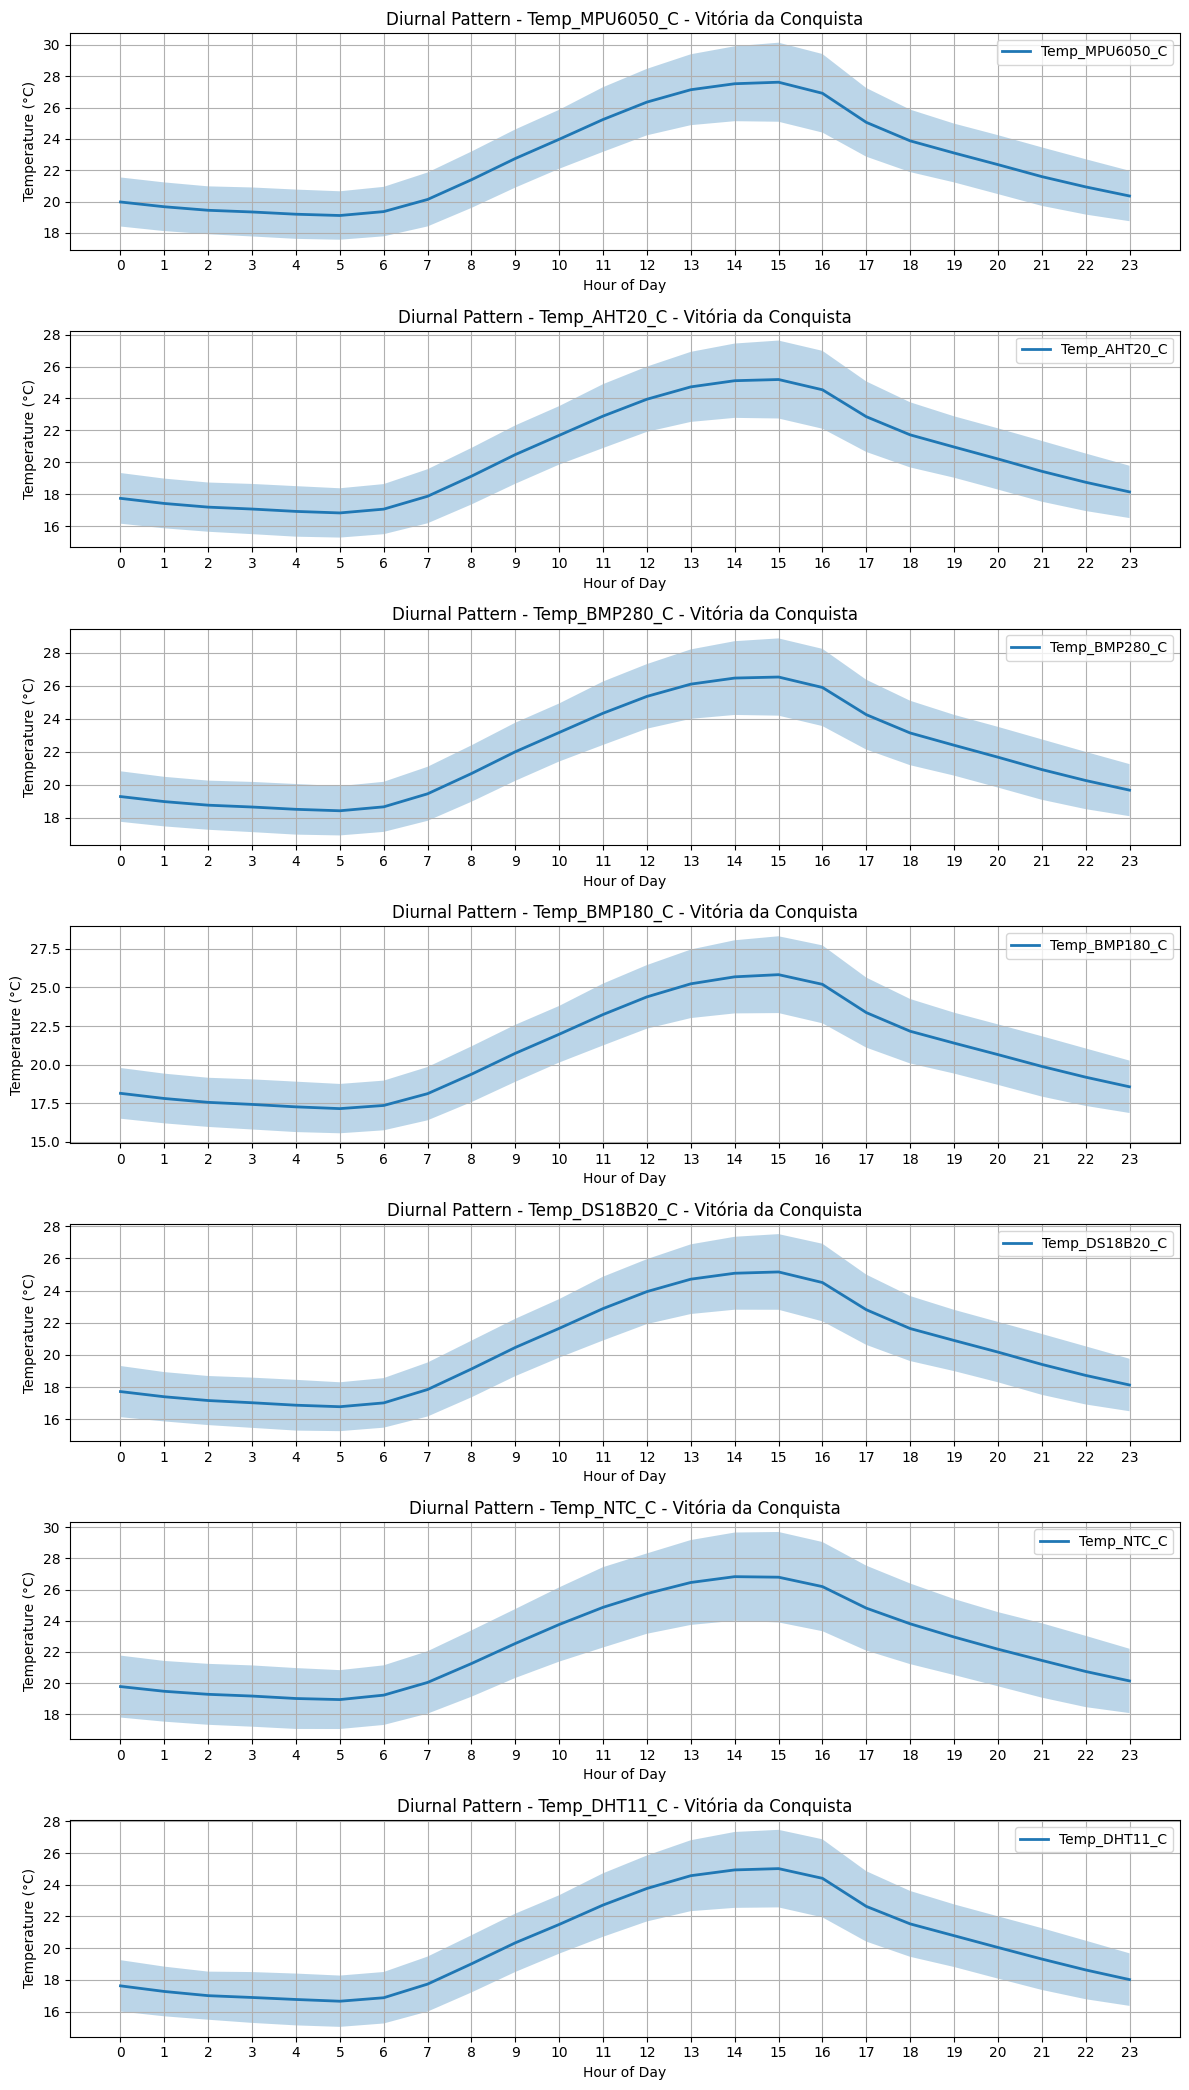

In [46]:
# Add hour column
# Basically, here we perform an analysis where the average temperature per hour is calculated
# Each hour will have ~30 temperature measurements since it repeats every day
# From these 30 measurements, the mean will be computed and plotted for analysis
df['hour'] = df.index.hour  # Extract hour from dataset

# Mean and standard deviation per hour for all temperature sensors
temp_sensors = ['Temp_MPU6050_C', 'Temp_AHT20_C', 'Temp_BMP280_C',
                'Temp_BMP180_C', 'Temp_DS18B20_C', 'Temp_NTC_C', 'Temp_DHT11_C']

hourly_pattern = df.groupby('hour')[temp_sensors].agg(['mean', 'std'])  # Group by hour, calculate mean and std

# Plot diurnal pattern
fig, axes = plt.subplots(len(temp_sensors), 1, figsize=(12, 3*len(temp_sensors)))  # 7 stacked vertical subplots, one per sensor
for i, sensor in enumerate(temp_sensors):
    x = hourly_pattern.index            # x-axis: hours of the day (0 to 23)
    y = hourly_pattern[sensor]['mean'] # y-axis: mean temperature per hour for the current sensor
    std = hourly_pattern[sensor]['std'] # Standard deviation per hour, used for confidence interval

    axes[i].plot(x, y, linewidth=2, label=f'{sensor}')
    axes[i].fill_between(x, y-std, y+std, alpha=0.3)  # Deviation interval
    axes[i].set_ylabel('Temperature (°C)')
    axes[i].set_xlabel('Hour of Day')
    axes[i].set_title(f'Diurnal Pattern - {sensor} - Vitória da Conquista')  # Added location
    axes[i].grid(True)
    axes[i].legend()
    axes[i].set_xticks(range(0, 24, 1))  # Set x-axis ticks every 1 hour

plt.tight_layout()
plt.savefig('Temperature_Diurnal_Pattern_Comparison.png')
plt.show()

The diurnal pattern analysis reveals remarkably consistent thermal cycles across all seven temperature sensors, with nocturnal minima occurring around 5-7 AM (18-19°C) and afternoon maxima peaking between 2-4 PM (25-28°C), demonstrating the classic tropical highland radiation-driven pattern. All sensors show excellent phase synchronization with similar heating rates ( aprox 1°C/hour from sunrise) and cooling rates (aprox 0.5°C/hour after sunset), though amplitude variations exist: the NTC thermistor exhibits the widest diurnal range (~8-10°C with peaks near 27°C) likely due to enhanced solar exposure, while the BMP180 shows slightly broader confidence bands indicating greater day-to-day variability.

The MPU6050, AHT20, BMP280, DS18B20, and DHT11 display tighter clustering with narrower standard deviation envelopes (shown in blue shading), confirming their superior measurement consistency across the 30-day averaging period. Notably, all sensors capture the characteristic asymmetric heating profile: rapid morning warming (6-14h) followed by slower afternoon cooling (14-24h), consistent with solar radiation dominance during heating and slower radiative/convective losses during cooling. The early morning temperature plateau (0-6 AM) at ~18-19°C represents the radiative equilibrium point where surface cooling stabilizes, often coinciding with dew point temperatures that trigger fog formation as observed in the humidity data.

### 2.2.2. Humidity

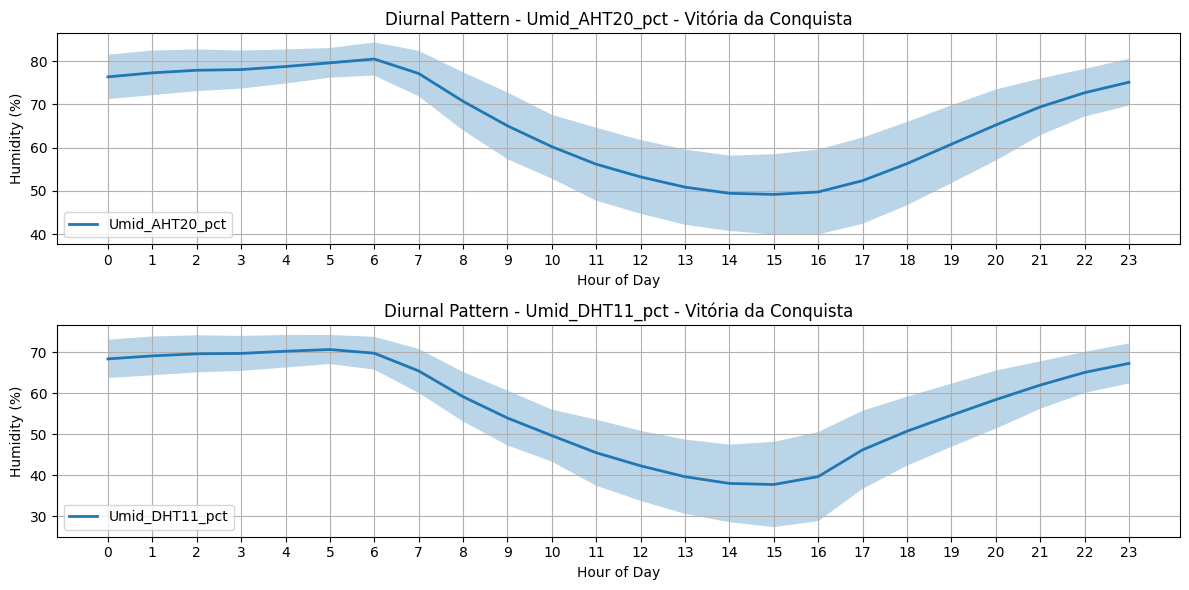

In [38]:
# Add hour column
# Basically, here we perform an analysis where the average humidity per hour is calculated
# Each hour will have ~30 humidity measurements since it repeats every day
# From these 30 measurements, the mean will be computed and plotted for analysis
df['hour'] = df.index.hour  # Extract hour from dataset

# Mean and standard deviation per hour for all humidity sensors
humidity_sensors = ['Umid_AHT20_pct', 'Umid_DHT11_pct']

hourly_pattern_humidity = df.groupby('hour')[humidity_sensors].agg(['mean', 'std'])  # Group by hour, calculate mean and std

# Plot diurnal pattern
fig, axes = plt.subplots(len(humidity_sensors), 1, figsize=(12, 3*len(humidity_sensors)))  # stacked vertical subplots, one per sensor
for i, sensor in enumerate(humidity_sensors):
    x = hourly_pattern_humidity.index            # x-axis: hours of the day (0 to 23)
    y = hourly_pattern_humidity[sensor]['mean'] # y-axis: mean humidity per hour for the current sensor
    std = hourly_pattern_humidity[sensor]['std'] # Standard deviation per hour, used for confidence interval

    axes[i].plot(x, y, linewidth=2, label=f'{sensor}')
    axes[i].fill_between(x, y-std, y+std, alpha=0.3)  # Deviation interval
    axes[i].set_ylabel('Humidity (%)')
    axes[i].set_xlabel('Hour of Day')
    axes[i].set_title(f'Diurnal Pattern - {sensor} - Vitória da Conquista')  # Added location
    axes[i].grid(True)
    axes[i].legend()
    axes[i].set_xticks(range(0, 24, 1))  # Set x-axis ticks every 1 hour

plt.tight_layout()
plt.show()


The humidity diurnal patterns show inverse correlation with temperature: nocturnal maxima of 75-80% (AHT20) and 68-72% (DHT11) at 5-7 AM during fog formation, dropping to afternoon minima of 48-52% (AHT20) and 38-42% (DHT11) at peak heating hours. The AHT20 consistently reads 8-10% higher across all hours, confirming superior accuracy, while the DHT11 shows wider confidence bands indicating greater measurement variability and its known tendency to underestimate at high humidity. This anti-phase relationship with temperature (high humidity when cool, low humidity when hot) validates the physical coupling between variables and confirms dataset consistency for meteorological analysis.

### 2.2.3. Pressure

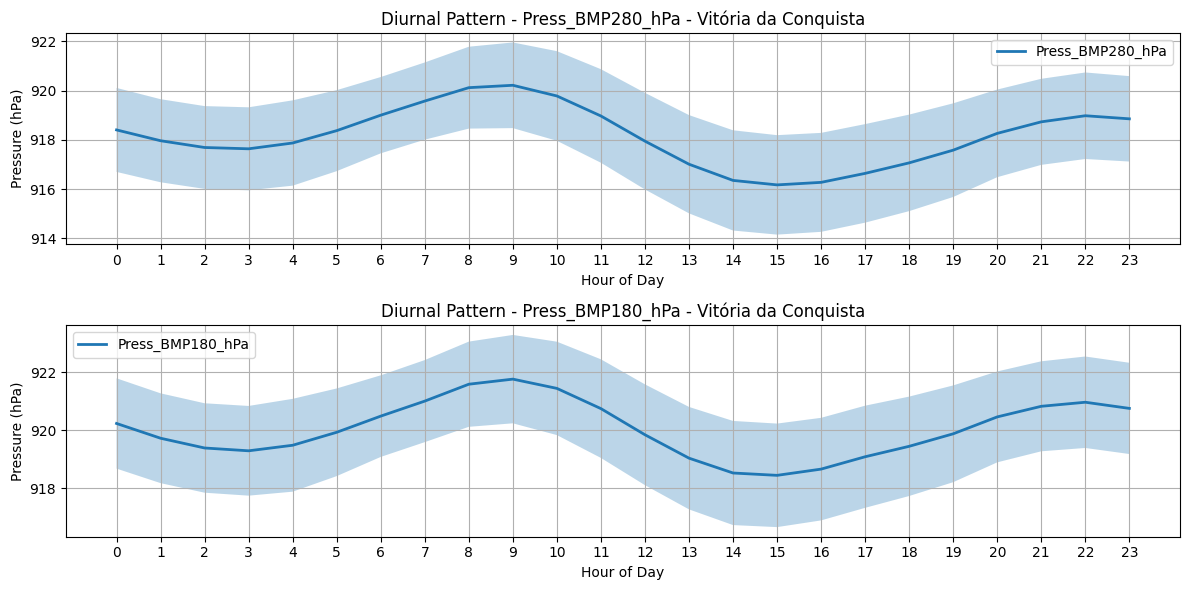

In [48]:
# Add hour column
# Basically, here we perform an analysis where the average pressure per hour is calculated
# Each hour will have ~30 pressure measurements since it repeats every day
# From these 30 measurements, the mean will be computed and plotted for analysis
df['hour'] = df.index.hour  # Extract hour from dataset

# Mean and standard deviation per hour for all pressure sensors
pressure_sensors = ['Press_BMP280_hPa', 'Press_BMP180_hPa']

hourly_pattern_pressure = df.groupby('hour')[pressure_sensors].agg(['mean', 'std'])  # Group by hour, calculate mean and std

# Plot diurnal pattern
fig, axes = plt.subplots(len(pressure_sensors), 1, figsize=(12, 3*len(pressure_sensors)))  # stacked vertical subplots, one per sensor
for i, sensor in enumerate(pressure_sensors):
    x = hourly_pattern_pressure.index            # x-axis: hours of the day (0 to 23)
    y = hourly_pattern_pressure[sensor]['mean'] # y-axis: mean pressure per hour for the current sensor
    std = hourly_pattern_pressure[sensor]['std'] # Standard deviation per hour, used for confidence interval

    axes[i].plot(x, y, linewidth=2, label=f'{sensor}')
    axes[i].fill_between(x, y-std, y+std, alpha=0.3)  # Deviation interval
    axes[i].set_ylabel('Pressure (hPa)')
    axes[i].set_xlabel('Hour of Day')
    axes[i].set_title(f'Diurnal Pattern - {sensor} - Vitória da Conquista')  # Added location
    axes[i].grid(True)
    axes[i].legend()
    axes[i].set_xticks(range(0, 24, 1))  # Set x-axis ticks every 1 hour

plt.tight_layout()
plt.savefig('Pressure_Diurnal_Pattern_Comparison.png')
plt.show()

## 2.3. Weekly and Day-of-Week Analysis
--------

### 2.3.1. Temperature

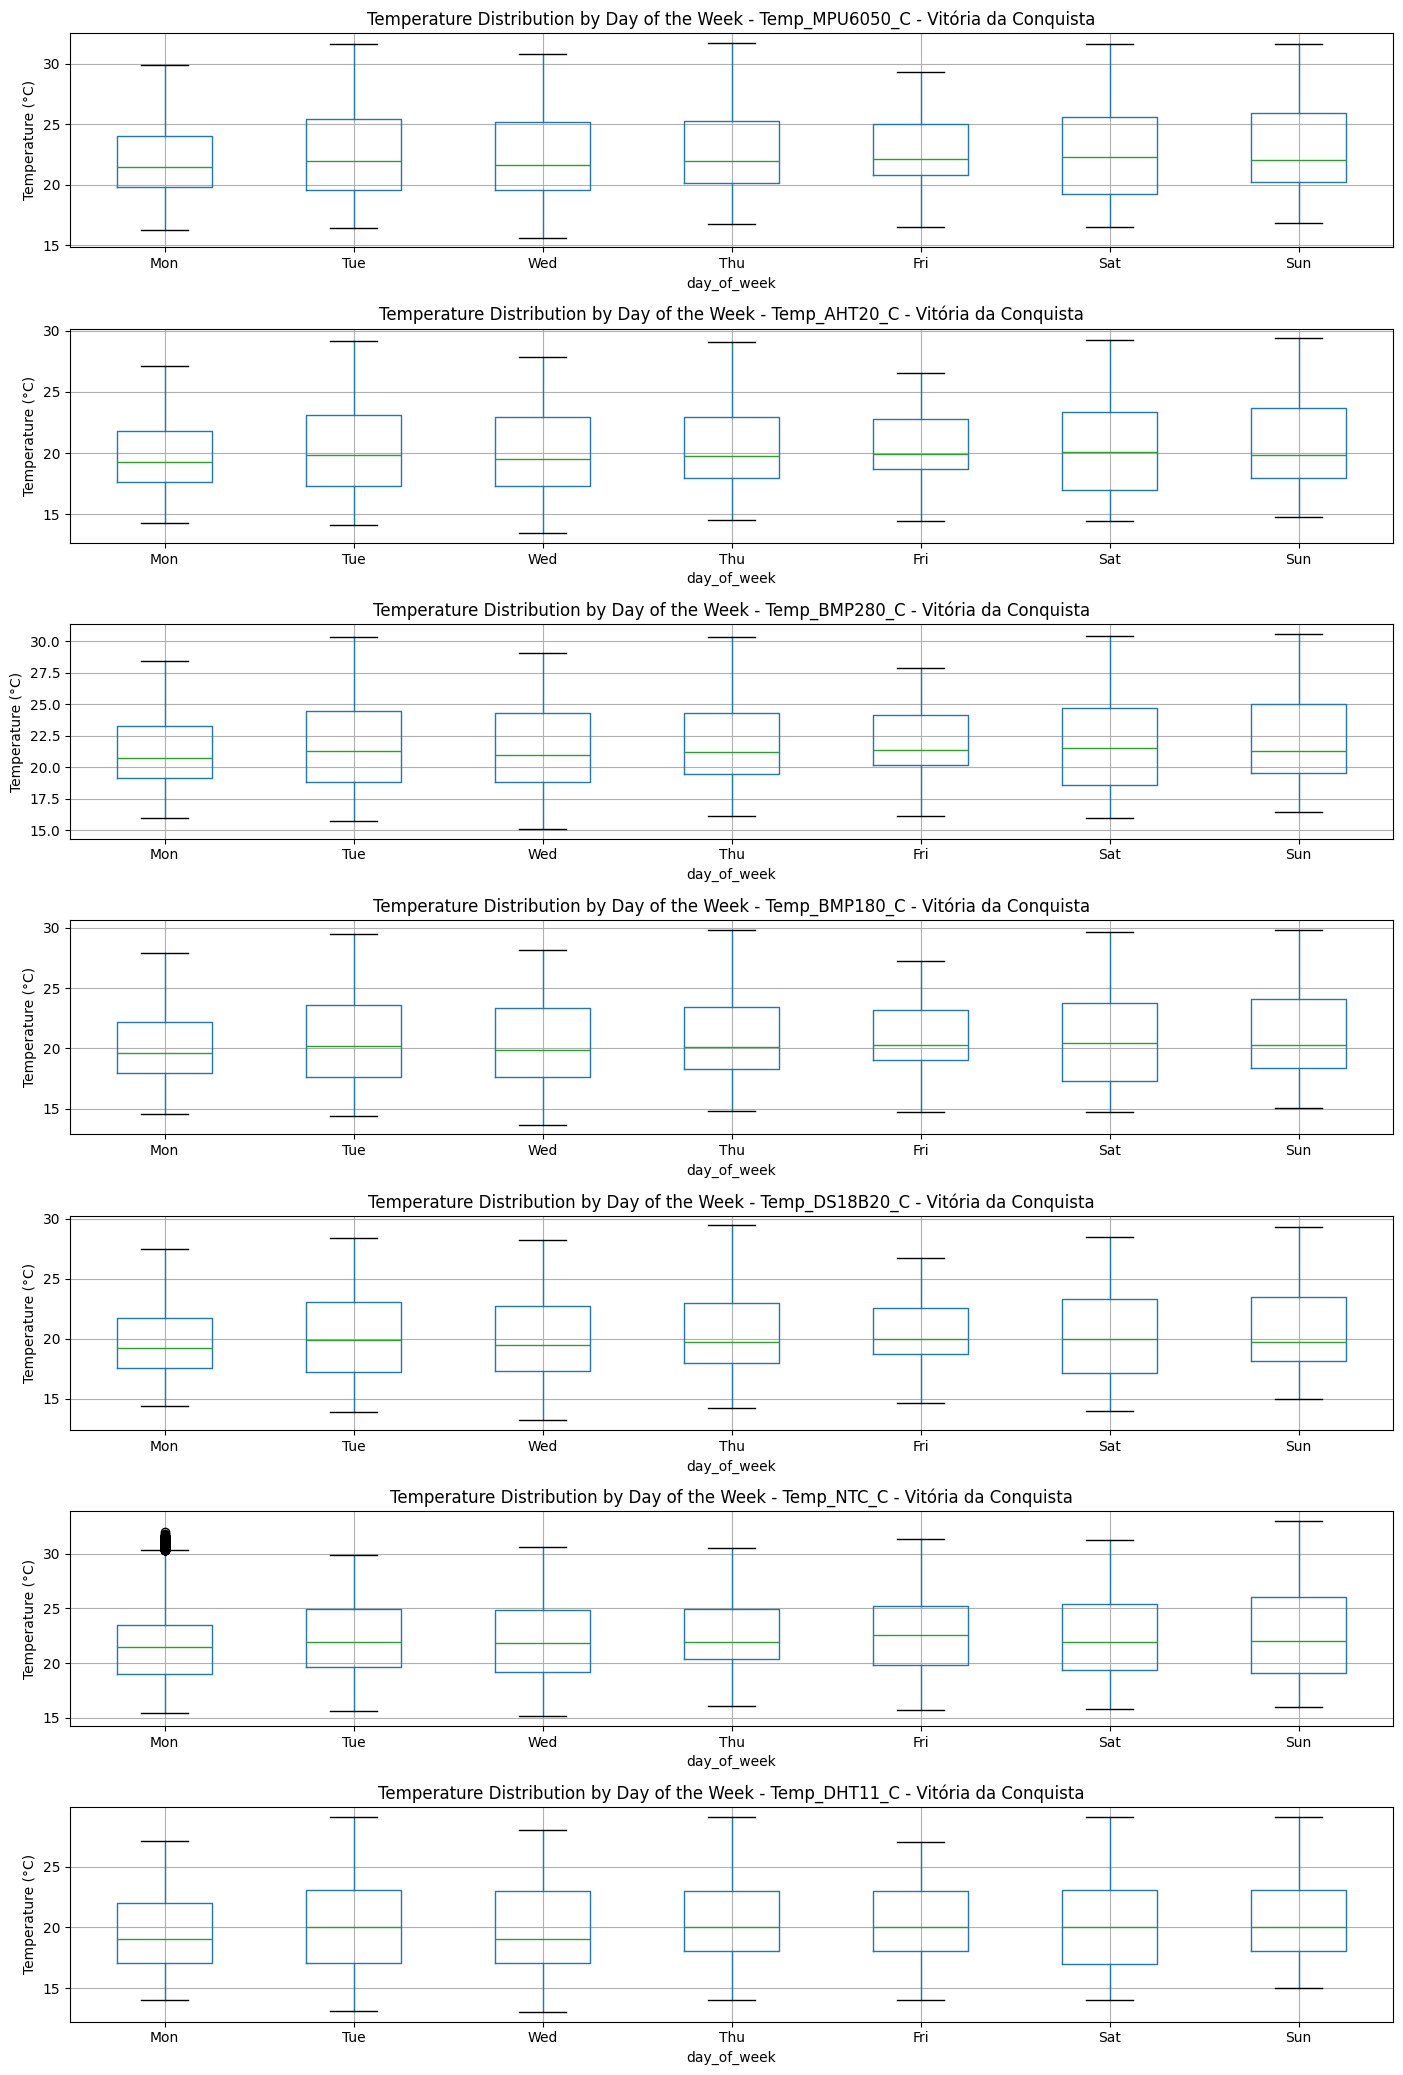

In [49]:
# Add day of the week
# Each box represents all values recorded on all Mondays,
# another for all Tuesdays, etc.
# The line inside the box shows the median of the day of the week.
# The edges of the box show the 1st and 3rd quartile (25% and 75% of the data).
df['day_of_week'] = df.index.day_name()  # Get day names from datetime index on CSV
df['week'] = df.index.isocalendar().week  # Get ISO week number

# List of temperature sensors
temp_sensors = ['Temp_MPU6050_C', 'Temp_AHT20_C', 'Temp_BMP280_C',
                'Temp_BMP180_C', 'Temp_DS18B20_C', 'Temp_NTC_C', 'Temp_DHT11_C']

# Create a single figure with subplots for each sensor
fig, axes = plt.subplots(len(temp_sensors), 1, figsize=(14, 3*len(temp_sensors)))  # one subplot per sensor

# Generate boxplots in subplots
for i, sensor in enumerate(temp_sensors):
    # Box plot by day of the week
    df.boxplot(column=sensor, by='day_of_week', ax=axes[i])
    axes[i].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    axes[i].set_ylabel('Temperature (°C)')
    axes[i].set_title(f'Temperature Distribution by Day of the Week - {sensor} - Vitória da Conquista')

# Remove the automatic 'By day_of_week' subtitle added by pandas
plt.suptitle('')
plt.tight_layout()
plt.savefig(f'Temperature_Weekly_Distribution_{sensor}.png')
plt.show()

The weekly distribution analysis shows no significant differences between weekdays, with all sensors displaying consistent median temperatures (19-22°C) and interquartile ranges (18-24°C) across Monday through Sunday, confirming natural meteorological cycles dominate over any anthropogenic weekly patterns. Sunday exhibits slightly higher upper whiskers (30-32°C) across multiple sensors, possibly reflecting specific weather events during end-of-month periods, while the NTC shows a characteristic outlier on Monday (~31°C) consistent with its solar exposure sensitivity. This temporal homogeneity validates the dataset's representativeness for baseline climate characterization in Vitória da Conquista, where urban heat island effects are minimal and natural radiation balance governs thermal behavior regardless of weekday versus weekend.

### 2.3.2. Humidity

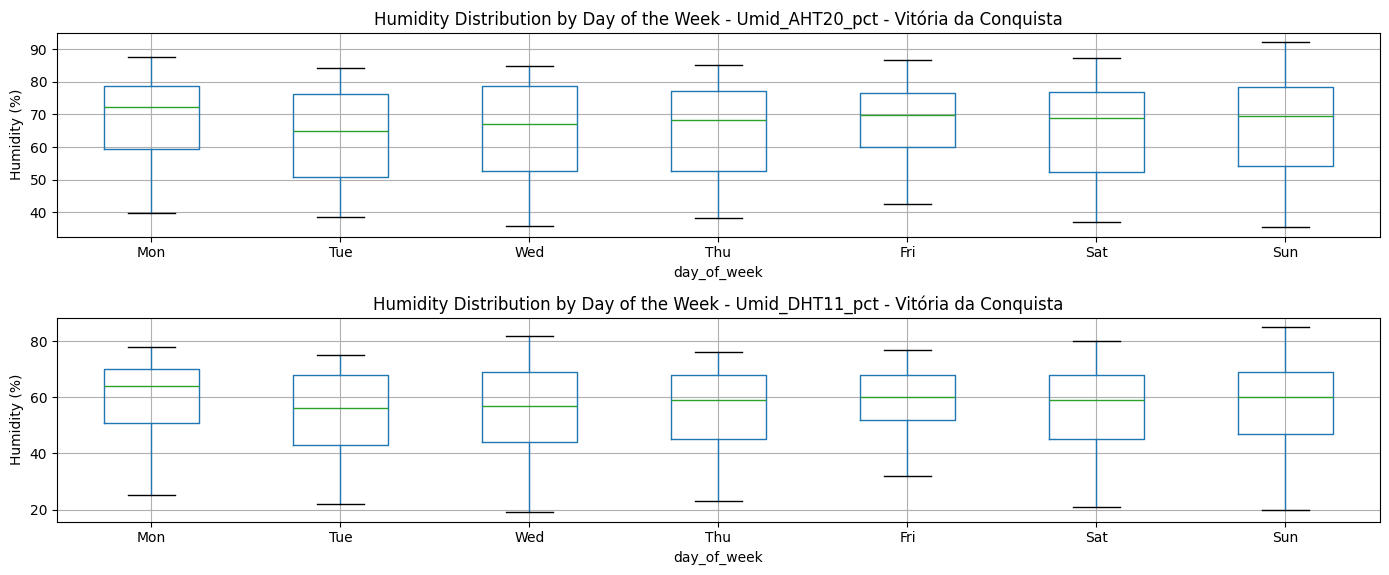

In [50]:
# Add day of the week
# Each box represents all values recorded on all Mondays,
# another for all Tuesdays, etc.
# The line inside the box shows the median of the day of the week.
# The edges of the box show the 1st and 3rd quartile (25% and 75% of the data).
df['day_of_week'] = df.index.day_name()  # Get day names from datetime index on CSV
df['week'] = df.index.isocalendar().week  # Get ISO week number

# List of humidity sensors
humidity_sensors = ['Umid_AHT20_pct', 'Umid_DHT11_pct']

# Create a single figure with subplots for each sensor
fig, axes = plt.subplots(len(humidity_sensors), 1, figsize=(14, 3*len(humidity_sensors)))  # one subplot per sensor

# Generate boxplots in subplots
for i, sensor in enumerate(humidity_sensors):
    # Box plot by day of the week
    df.boxplot(column=sensor, by='day_of_week', ax=axes[i])
    axes[i].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    axes[i].set_ylabel('Humidity (%)')
    axes[i].set_title(f'Humidity Distribution by Day of the Week - {sensor} - Vitória da Conquista')

# Remove the automatic 'By day_of_week' subtitle added by pandas
plt.suptitle('')
plt.tight_layout()
plt.savefig(f'Humidity_Weekly_Distribution_{sensor}.png')
plt.show()

The weekly humidity distribution shows remarkable consistency across all days for both sensors, with median values remaining stable around 68-70% (AHT20) and 58-60% (DHT11) throughout the week, and similar interquartile ranges (50-78% for AHT20, 45-68% for DHT11), confirming that humidity patterns are governed by natural diurnal cycles rather than weekly anthropogenic variations. Both sensors display identical box structures across weekdays and weekends, with outliers consistently appearing in the 85-92% range (nighttime fog events) and 20-40% range (dry afternoon periods), validating the dataset's temporal homogeneity. The AHT20 maintains its systematic 8-10% higher readings compared to DHT11 across all days, reinforcing the calibration offset observed in previous analyses, while Sunday shows slightly wider whiskers for both sensors, possibly reflecting greater day-to-day variability during end-of-month periods or specific meteorological events.

### 2.3.3. Pressure

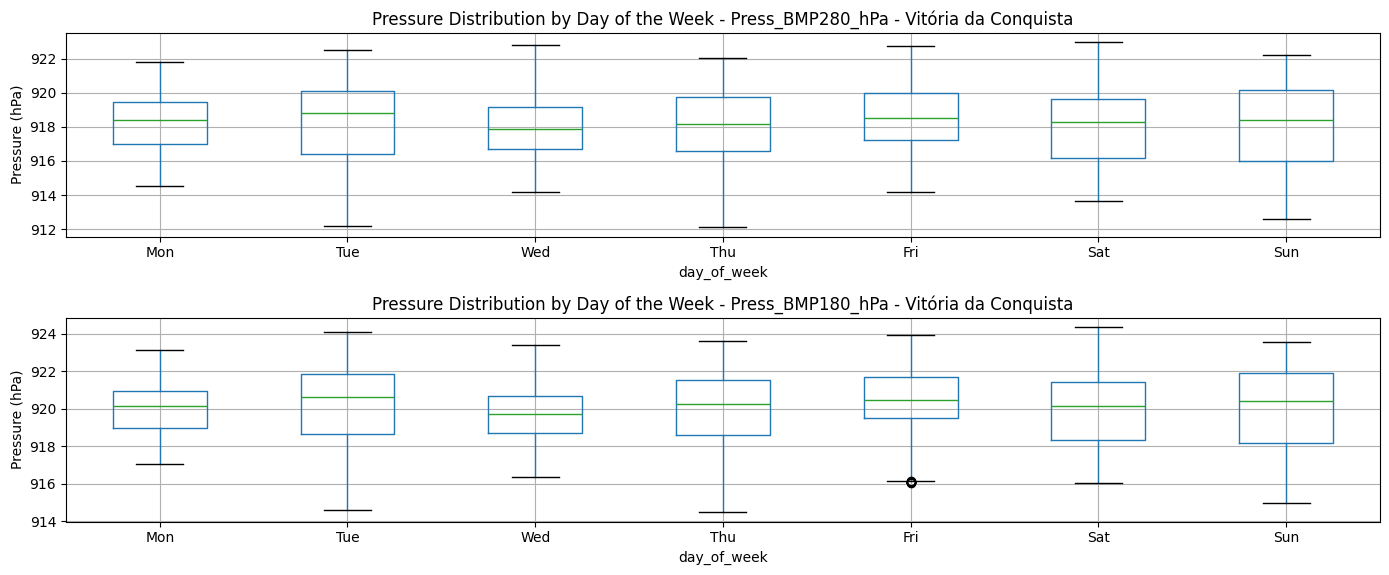

In [51]:
# Add day of the week
# Each box represents all values recorded on all Mondays,
# another for all Tuesdays, etc.
# The line inside the box shows the median of the day of the week.
# The edges of the box show the 1st and 3rd quartile (25% and 75% of the data).
df['day_of_week'] = df.index.day_name()  # Get day names from datetime index on CSV
df['week'] = df.index.isocalendar().week  # Get ISO week number

# List of pressure sensors
pressure_sensors = ['Press_BMP280_hPa', 'Press_BMP180_hPa']

# Create a single figure with subplots for each sensor
fig, axes = plt.subplots(len(pressure_sensors), 1, figsize=(14, 3*len(pressure_sensors)))  # one subplot per sensor

# Generate boxplots in subplots
for i, sensor in enumerate(pressure_sensors):
    # Box plot by day of the week
    df.boxplot(column=sensor, by='day_of_week', ax=axes[i])
    axes[i].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    axes[i].set_ylabel('Pressure (hPa)')
    axes[i].set_title(f'Pressure Distribution by Day of the Week - {sensor} - Vitória da Conquista')

# Remove the automatic 'By day_of_week' subtitle added by pandas
plt.suptitle('')
plt.tight_layout()
plt.savefig(f'Pressure_Weekly_Distribution_{sensor}.png')
plt.show()

 Both sensors show uniformly narrow box widths and minimal outliers across all days, reflecting the high precision and stability of barometric measurements compared to temperature and humidity, with the BMP180 maintaining its systematic 2 hPa positive offset relative to the BMP280. The absence of weekday-weekend differentiation and the consistent distribution patterns validate that local anthropogenic activities have negligible impact on atmospheric pressure, which responds only to regional and continental-scale meteorological phenomena such as frontal passages and pressure systems observed throughout September 2025.

# 3. Conclusion

-------------------

The temporal analysis of September 2025 data from Vitória da Conquista reveals robust diurnal patterns across all environmental variables, with temperature sensors capturing consistent 10-12°C daily amplitudes (minima ~18°C at 5-7 AM, maxima ~26°C at 2-4 PM), humidity displaying inverse correlation with strong bimodal distributions (nighttime peaks 75-80%, afternoon lows 48-52%), and pressure showing subtle semi-diurnal atmospheric tides (4-6 hPa variations) characteristic of tropical highland microclimates.

Weekly distribution analysis confirms no significant anthropogenic influence, with all sensors showing uniform statistical properties across weekdays and weekends, validating that natural radiation balance and synoptic weather systems dominate the observed patterns. High-precision sensors (BMP280, AHT20, DS18B20) demonstrated excellent phase synchronization and narrow confidence intervals, while budget sensors (DHT11, NTC) revealed characteristic limitations including quantization artifacts and solar exposure sensitivity, underscoring the value of multi-sensor redundancy for data validation. The dataset successfully captured September's transitional dry season characteristics including frequent nocturnal fog formation, strong cooling, and a mid-month low-pressure event, providing comprehensive baseline climatology for this 923-meter elevation highland location.